# **PROCESAMIENTO DEL HABLA - TP1** 💻

> 🙋🏻‍♂️ **Juan Andres Garcia Alves de Borba** (DNI 30.182.100)


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.

### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.



### Ejercicio Consigna

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.

</br>
<hr>
</br>

## 🔎 Punto 1 - Webscrapping

❗ &nbsp; Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase.  
Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios.  
Explica paso a paso como descargaste el texto de tu interés.

👉🏻 Librerías & imports ...

In [ ]:
# instalación de librerías adicionales
! pip install requests beautifulsoup4 html5lib spacy wordcloud

# descargar del modelo spaCy en español (versión small)
! python -m spacy download es_core_news_sm    # 35MB
# ! python -m spacy download es_core_news_md  # 93MB

In [333]:
# importar las librerías
import numpy as np
import re
import requests
import string
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import spacy
from spacy.language import Language
from spacy.pipeline import Sentencizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# descargar las stopwords y armar un conjunto set() ordenado, con stopwords comunes del idioma español
nltk.download('stopwords')
stopwords_es = sorted(set(stopwords.words('spanish')))

# cargar el modelo spaCy en español
spacy_nlp = spacy.load('es_core_news_sm')

# mayor ancho en el print() antes que se genere un salto de línea
np.set_printoptions(linewidth=220)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


👉🏻 Funciones auxiliares ...

In [334]:
# previsualizar el contenido del tag 'soup_tag', comenzando desde 'start', hasta 'limit' caracteres
def print_preview(soup_tag, start=0, limit=2000):
  text = str(soup_tag)
  print('- tamaño real:', len(text), 'caracteres.')
  print('- preview: \n ', text[start:limit], '...')

👉🏻 Descargar el contenido del sitio ...  
> https://www.iglesia.net/biblia/libros/lucas.html

In [335]:
# URL para el Webscrapping
url = "https://www.iglesia.net/biblia/libros/lucas.html"

try:
  response = requests.get(url)  # realizar la solicitud HTTP
  response.raise_for_status()   # lanza una excepción si hay un error en la solicitud

except requests.exceptions.RequestException as err: print(f"Error al consultar la URL { err }")
except Exception as err: print(f"Ocurrió un error inesperado: { err }")

# analizar el contenido HTML de la página ...
# otro parser: 'html5lib' (más robusto frente a HTML malformados, pero es más lento y consume más recursos)
soup = BeautifulSoup(response.text, 'html.parser')

👉🏻 El desafío ...  
</br>  
<div>
  <img src="https://raw.githubusercontent.com/andres-garcia-alves/issd-ph/refs/heads/main/Trabajo%20Practico%2001/Screenshot-01.png" width="90%" height="90%" alt="captura de pantalla"/>
</div>
<div>
  <font size="2">captura de pantalla</font>
</div>
</br>


In [336]:
# la 1ra ocurrencia de <div class="container"> es parte del navbar, en la 2da empieza el contenido principal
tag_div = soup.find_all("div", class_="container")[1]  # 2do elemento

print_preview(tag_div, start=1011, limit=2000)
# print(tag_div)   # opcional: descomentar para mostrar el choclo completo de HTML (+200k caracteres)

- tamaño real: 214202 caracteres.
- preview: 
  ef="#cap21">21</a>
| <a href="#cap22">22</a> | <a href="#cap23">23</a> | <a href="#cap24">24</a>
|</b><center><h1><font color="#666600"><font size="+1">Capítulo 1</font></font></h1></center><a name="cap1"></a>Dedicatoria a Teófilo <p>1:1 Puesto que ya muchos han tratado de poner en orden la historia de
las cosas que entre nosotros han sido ciertísimas, <br/>1:2 tal como nos lo enseñaron los que desde el principio lo
vieron con sus ojos, y fueron ministros de la palabra, <br/>1:3 me ha parecido también a mí, después de haber
investigado con diligencia todas las cosas desde su origen, escribírtelas
por orden, oh excelentísimo Teófilo, <br/>1:4 para que conozcas bien la verdad de las cosas en las cuales has
sido instruido. <p>Anuncio del nacimiento de Juan <p>1:5 Hubo en los días de Herodes, rey de Judea, un sacerdote llamado
Zacarías, de la clase de Abías;<a href="1cronicas.html#cap24"><img alt="1 Cronicas 24. 10" border="0" height="14" hsp

</br>  
<div>
  <img src="https://raw.githubusercontent.com/andres-garcia-alves/issd-ph/refs/heads/main/Trabajo%20Practico%2001/Screenshot-02.png" width="100%" height="100%" alt="captura de pantalla"/>
</div>
<div>
  <font size="2">captura de pantalla</font>
</div>
</br>


In [337]:
# eliminar las flechas de 'subir arriba' entre los capítulos
for a in tag_div.select('a[href="#arriba"]'):
  if (a.text == 'é'):
    a.find_parent('div').decompose() # remover del DOM

&nbsp;

👉🏻 La página está compuesta por:
  - el título
  - luego sigue una botonera por capítulos (no me sirve)
  - tras de ella el texto principal
  - y al pie de página un mini-menú de navegación (este último tampoco sirve).

👉🏻 La **principal dificultad** con el layout de esta página web, es que no lleva una estructura jerárquica que organice el contenido... osea utilizando etiquetas `div`/`section` individuales para al título, la botonera, el contenido principal y la navegación del final.  
Por el contrario, está todo el contenido de forma contígua dentro del `div` general 😞.

👉🏻 Mi estrategia será extraer primero el título, luego el contenido principal, para porteriormente concatenarlos.

In [338]:
# EXTRAER EL TITULO

# la 1ra etiqueta <center> es el título
tag_center = soup.find("center")

# 'separator' evita que se peguen el texto propio de la etiqueta 'center' y el de sus sub-etiquetas HTML
# 'strip()' remueve posibles espacios al comienzo y al final de la cadena
title = tag_center.get_text(separator=' ').strip()

print('- nodo html:  ', tag_center)
print('- texto:      ', title, '\n')
# print(center.prettify())  # opcional: descomentar para visualizar el HTML formateado

- nodo html:   <center>El Santo Evangelio Según<br/><b><font size="+2">SAN LUCAS</font></b></center>
- texto:       El Santo Evangelio Según SAN LUCAS 



👉🏻 Para la extracción del contenido principal del texto, podría aplicar el enfoque de levantar todo lo que esté entre las frases 'El Santo Evangelio [...]' y '[...] Amén.', replicando lo visto en clase.

👉🏻 No obstante para este caso, tras revisar la estructira del sitio... me voy a decantar por levantar todo lo que este entre la etiqueta `center` con el contenido 'Capítulo 1', y la etiqueta `center` con el contenido 'Volver arriba' (esta última del mini-menú al pie de página).

👉🏻 Considero que este enfoque es más robusto 💪🏻, ya que podría aplicarse **sin cambios** a las demás páginas del sitio, dado que estas también presentan la misma estrutura de etiquetas HTML.

Por ejemplo:
  - Evangelio de Mateo: &nbsp; https://www.iglesia.net/biblia/libros/mateo.html
  - Libro de Santiago: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://www.iglesia.net/biblia/libros/santiago.html
  - etc ...

👉🏻 Para facilitarme la tarea, me creé 2 simples funciones que permiten:
  - buscar una etiqueta por tipo + su innertext
  - extraer el texto entre dos etiquetas cualquiera

In [339]:
# EXTRAER EL CONTENIDO PRINCIPAL

# buscar el primer tag HTML del tipo 'tag_name' y con el texto 'inner_text'
def search_tag(tag_name, inner_text):
  for tag in soup.find_all(tag_name):
    if inner_text in tag.get_text(strip=True):
      return tag

# extraer el texto contenido entre 'start_tag' (includio) y 'end_tag' (excluido)
def extract_text_between(start_tag, end_tag):
  content = start_tag.get_text(strip=True) + ' '
  asd = start_tag.find_next_siblings()
  for elem in start_tag.find_next_siblings():
    if elem != end_tag:
      text = elem.get_text(separator=' ', strip=True)
      content += text + ' ' if text != '' else ''
    else:
      break
  return content

# descarto user "soup.find('center', string='Capítulo 1')", xq no funciona si hay otras etiquetas anidadas...
start_tag = search_tag('center', 'Capítulo 1')
end_tag = search_tag('center', 'Volver arriba')
print('- tag inicio:  ', start_tag)
print('- tag fin:     ', end_tag, '\n')

# extraer el texto entre 'Capítulo 1' y 'Volver arriba' (el mini-menú al pie de página)
main_content = extract_text_between(start_tag, end_tag)

- tag inicio:   <center><h1><font color="#666600"><font size="+1">Capítulo 1</font></font></h1></center>
- tag fin:      <center><p><a href="#arriba">Volver arriba <font face="Wingdings"><font color="#666600"><font size="+1">é</font></font></font></a><br/><a href="marcos.html">San Marcos</a><br/><a href="indice.html">Principal</a><br/><a href="juan.html">San Juan</a></p></center> 



In [340]:
# CONCATENAR EL TITULO + CONTENIDO PRINCIPAL

corpus = title + ' ' + main_content
corpus[:500]
# corpus

'El Santo Evangelio Según SAN LUCAS Capítulo 1 1:1 Puesto que ya muchos han tratado de poner en orden la historia de\nlas cosas que entre nosotros han sido ciertísimas, 1:2 tal como nos lo enseñaron los que desde el principio lo\nvieron con sus ojos, y fueron ministros de la palabra, 1:3 me ha parecido también a mí, después de haber\ninvestigado con diligencia todas las cosas desde su origen, escribírtelas\npor orden, oh excelentísimo Teófilo, 1:4 para que conozcas bien la verdad de las cosas en las '

&nbsp;
## ✂️ Punto 2 - Preprocesamiento

&nbsp;
### ➡️ 2.1 Muestra las stop-words que tenga tu texto.

In [341]:
# separar el corpus en términos
words = corpus.lower().split()

# detectar stopwords (insensible a mayúsculas/minúsculas)
detected_stopwords = [w for w in words if w.lower() in stopwords_es]

# remover duplicados y ordenar la lista resultante
detected_stopwords = sorted(set(detected_stopwords))

# stopwords
print('stopwords')
print('- disponibles: ', stopwords_es)
print('- detectados:  ', detected_stopwords)
print('- cant. detectados:', len(detected_stopwords))

stopwords
- disponibles:  ['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis

&nbsp;
### ➡️ 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras (usa la biblioteca worldcloud de Python).

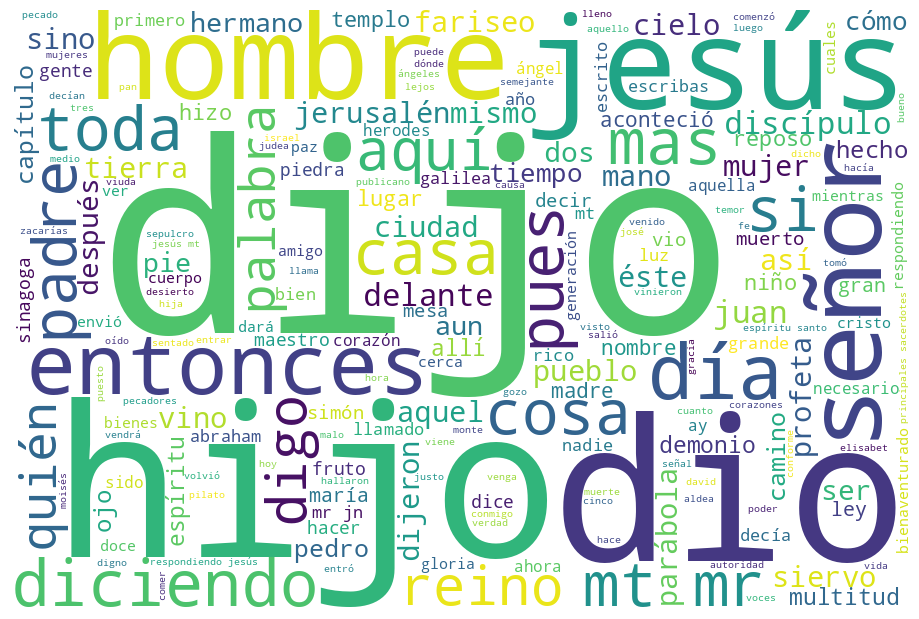


- antes:    El Santo Evangelio Según SAN LUCAS Capítulo 1 1:1 Puesto que ya muchos han tratado de poner en orden la historia de
las cosas que entre nosotros han sido ciertísimas, 1:2 tal como nos lo enseñaron los 

- después:  santo evangelio según san lucas capítulo 1 1:1 puesto tratado poner orden historia cosas sido ciertísimas, 1:2 tal enseñaron principio vieron ojos, ministros palabra, 1:3 parecido mí, después haber in


In [342]:
# pasar el corpus a minúsculas
filtered_corpus = corpus.lower()

# remover lo que no sean caracteres alfanuméricos, espacios, coma y dos puntos
filtered_corpus = re.sub(r'[^\w\s,:]', '', filtered_corpus)

# crear la instancia de WordCloud (tamaño de imagen, fondo y stopwords)
# al momento de la visualización con WordCloud, esta librería ya permite incorporarle las stopwords en el parámetro homónimo
wordcloud = WordCloud(width=900, height=600, background_color="white", stopwords=stopwords_es).generate(filtered_corpus)

# mostrar la nube de palabras
plt.figure(figsize=(9, 6))  # tamaño de la figura
plt.axis("off")             # desacticar los ejes cartesianos
plt.tight_layout(pad=0)     # padding 0
plt.imshow(wordcloud)       # crear la imagen
plt.show()                  # mostrar por pantalla

# para la visualización se aprovechó el parámetro 'stopwords' de WordCloud,
# no obstante las stopwords de 'filtered_corpus' aún no han sido removidas...
filtered_corpus = filtered_corpus.split()
filtered_corpus = ' '.join(w for w in filtered_corpus if w not in stopwords_es)

print()
print('- antes:   ', corpus[:200], '\n')      # preview de 175 caracteres
print('- después: ', filtered_corpus[:200])   # preview de 175 caracteres

&nbsp;
### ➡️ 2.3 Usando el texto que conseguiste en el Punto 1 ...


&nbsp;
#### ✅ 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.

👉🏻 Preprocesado del texto ...

In [363]:
print('longitud del corpus:')

# pasar a minúsculas
corpus_cleared = corpus.lower()
print('- paso 1:', len(corpus_cleared))

# filtrar el corpus a caracteres alfanuméricos, espacios, coma y dos puntos
corpus_cleared = re.sub(r'[^\w\s,.:]', '', corpus_cleared)
print('- paso 2:', len(corpus_cleared))

# remover saltos de línea (sería innecesario por el paso previo, lo dejo igualmente a fines didácticos)
corpus_cleared = corpus_cleared.replace('\n', ' ')
print('- paso 3:', len(corpus_cleared))

# remover el texto del mini-menú del pie de página
corpus_cleared = corpus_cleared.replace('volver arriba é san marcos principal san juan', '')
print('- paso 4:', len(corpus_cleared))

# remover stopwords (insensible a mayúsculas/minúsculas)
corpus_cleared = corpus_cleared.split()
corpus_cleared = ' '.join(w for w in corpus_cleared if w not in stopwords_es)
print('- paso 5:', len(corpus_cleared))

# agrego a la lista de filtro 2 caracteres del español,
punctuation_ext = string.punctuation + "¡¿"
# pero remuevo los dos puntos ':', que los necesito al descomponer en oraciones (próx. celda)
punctuation_ext = punctuation_ext.replace(":", "")
# eliminar los signos de puntuación
corpus_cleared = ''.join(c for c in corpus_cleared if c not in punctuation_ext)
print('- paso 6:', len(corpus_cleared))

print()
print(corpus_cleared[:175], '...')    # preview de 175 caracteres
# print(corpus_cleared)

longitud del corpus:
- paso 1: 137944
- paso 2: 136602
- paso 3: 136602
- paso 4: 136557
- paso 5: 91519
- paso 6: 87956

santo evangelio según san lucas capítulo 1 1:1 puesto tratado poner orden historia cosas sido ciertísimas 1:2 tal enseñaron principio vieron ojos ministros palabra 1:3 parecid ...


&nbsp;  
👉🏻 Descomposición en oraciones (SpaCy)

In [355]:
# Aquí SI utilicé Chat-GPT como generador de código.
# Prompt: "necesito modificar el comportamiento de SpaCy para que también acepte el caracter coma ',' como separador de oraciones" (o uno muy similar).
# Nota:
# - igualmente fue una batalla de errores y re-preguntas.
# - el modo de agregar un 'custom-sentencizer' al pipeline interno de SpaCy cambia totalmente con entre versiones.
# - entre varios idas y vueltas, más modificaciones propias, el código quedó como sigue:

# eliminar el componente de segmentación si existieran
# (bazofia de SpaCy que ya tiene un sentencizer predeterminado, y no deja simplemente reemplazarlo y ya)
for pipe_name in ["parser", "custom_sentencizer"]:
  if pipe_name in spacy_nlp.pipe_names:
    spacy_nlp.remove_pipe(pipe_name)

# definir un segmentador customizado
@Language.component("custom_sentencizer")
def custom_sentencizer(doc):

  # expresión regular para detectar las estructuras del tipo 'capítulo:versículo' en el texto
  # previamente probé con un: "if token.text in [',', '.']:" -> pero me enganchaba tmb las comas de mitad de la oración :(
  verse_pattern = re.compile(r"^\d+:\d+$")

  for i, token in enumerate(doc):
    if verse_pattern.match(token.text):
      token.is_sent_start = True
    else:
      token.is_sent_start = False if i != 0 else True
  return doc

# añadir el segmentador personalizado al pipeline interno de SpaCy
spacy_nlp.add_pipe("custom_sentencizer", first=True)

# parsear el 'corpus' diviéndolo en 'documentos'
spacy_doc = spacy_nlp(corpus_cleared)

# mostrar las primeras 20 líneas (ya que el output es largísimo)...
# for sentence in spacy_doc.sents:      # descomentar si se prefiere ver el output completo
for sentence in list(spacy_doc.sents)[:20]:
  print(sentence.text)

santo evangelio según san lucas capítulo 1
1:1 puesto tratado poner orden historia cosas sido ciertísimas,
1:2 tal enseñaron principio vieron ojos, ministros palabra,
1:3 parecido mí, después haber investigado diligencia todas cosas origen, escribírtelas orden, oh excelentísimo teófilo,
1:4 conozcas bien verdad cosas cuales sido instruido. anuncio nacimiento juan
1:5 días herodes, rey judea, sacerdote llamado zacarías, clase abías mujer hijas aarón, llamaba elisabet.
1:6 ambos justos delante dios, andaban irreprensibles mandamientos ordenanzas señor.
1:7 hijo, elisabet estéril, ambos edad avanzada.
1:8 aconteció ejerciendo zacarías sacerdocio delante dios según orden clase,
1:9 conforme costumbre sacerdocio, tocó suerte ofrecer incienso, entrando santuario señor.
1:10 toda multitud pueblo orando hora incienso.
1:11 apareció ángel señor puesto pie derecha altar incienso.
1:12 turbó zacarías verle, sobrecogió temor.
1:13 ángel dijo: zacarías, temas oración sido oída, mujer elisabet dará 

&nbsp;  
👉🏻 Matriz Documento-Vocabulario

In [356]:
sents = [s.text for s in spacy_doc.sents]
print(sents)

# crear el vectorizador
vectorizer = CountVectorizer()

# cada 'palabra' se transforma a un vector de frecuencias
frec_matrix = vectorizer.fit_transform(sents)

['santo evangelio según san lucas capítulo 1', '1:1 puesto tratado poner orden historia cosas sido ciertísimas,', '1:2 tal enseñaron principio vieron ojos, ministros palabra,', '1:3 parecido mí, después haber investigado diligencia todas cosas origen, escribírtelas orden, oh excelentísimo teófilo,', '1:4 conozcas bien verdad cosas cuales sido instruido. anuncio nacimiento juan', '1:5 días herodes, rey judea, sacerdote llamado zacarías, clase abías mujer hijas aarón, llamaba elisabet.', '1:6 ambos justos delante dios, andaban irreprensibles mandamientos ordenanzas señor.', '1:7 hijo, elisabet estéril, ambos edad avanzada.', '1:8 aconteció ejerciendo zacarías sacerdocio delante dios según orden clase,', '1:9 conforme costumbre sacerdocio, tocó suerte ofrecer incienso, entrando santuario señor.', '1:10 toda multitud pueblo orando hora incienso.', '1:11 apareció ángel señor puesto pie derecha altar incienso.', '1:12 turbó zacarías verle, sobrecogió temor.', '1:13 ángel dijo: zacarías, tema

In [357]:
# extraer los 'términos' del vocabulario
vocabulario = vectorizer.get_feature_names_out()

print("- vocabulario:")
print(vocabulario[:1700])   # corto al 700vo elemento, son una bocha...
print("...")

# print(vocabulario)       # descomentar para el output completo

- vocabulario:
['10' '1011' '1014' '11' '110' '111' '1113' '1114' '112' '114' '115' '117' '12' '120' '1213' '1217' '1218' '1219' '1225' '13' '1314' '1315' '1316' '1317' '1319' '1320' '1321' '1322' '136' '14' '1415' '1416' '1417'
 '1418' '1421' '1429' '15' '1519' '1520' '1522' '1526' '16' '1617' '1620' '1630' '17' '1719' '1729' '1730' '1731' '18' '1822' '1823' '1825' '1826' '1827' '19' '1920' '1921' '1923' '1924' '1928' '20' '2024' '2027' '21'
 '211' '2122' '2123' '2125' '2128' '2130' '2141' '2143' '219' '22' '2223' '2230' '23' '2325' '2326' '2327' '2328' '2333' '24' '2427' '2437' '25' '2526' '2527' '2534' '26' '2631' '27' '2730' '2731' '2733' '28' '2834'
 '2838' '29' '2931' '2934' '2935' '30' '3032' '3044' '31' '3132' '3135' '31e' '32' '323' '3234' '3242' '3256' '328' '33' '3337' '3344' '34' '3436' '35' '3537' '3539' '3541' '36' '3638' '3641' '3646' '37' '3739' '3754'
 '38' '3819' '3840' '3842' '3848' '39' '40' '4045' '41' '4144' '4146' '42' '4244' '4247' '43' '4345' '4350' '44' '45' '

In [347]:
print("- matriz documento-vocabulario:")
print(frec_matrix.toarray()[:1])  # corto al 1er elemento, son una bocha...
# print(frec_matrix.toarray())    # descomentar para el output completo

- matriz documento-vocabulario:
[[  1   1   1   2   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   2
    1   1   1   1   1   2   1   1   1   2   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1
    2   1   1   1   1   1   2   1   2   3   1   2   1   2   1   2   1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   2   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1
    2   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   2   2   2   2   1   1   2   1   2   1   1   1   2   1   1   1   1   1   1   1   1   2   1   1   1   1
    1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   2   1   1   1   2   2   1   1   

&nbsp;
#### ✅ 2.3.2 Determina la longitud de tu vocabulario.

In [348]:
print("- longitud del vocabulario:", len(vocabulario))

- longitud del vocabulario: 4693


&nbsp;
#### ✅ 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [317]:
# crear un transformador TF-IDF
tf_idf = TfidfTransformer()

# aplicar TF-IDF a la matriz de frecuencias
tfidf_matrix = tf_idf.fit_transform(frec_matrix)
tfidf_arrays = tfidf_matrix.toarray()

# mostrar la matriz TF-IDF
print(tfidf_arrays[0])  # corto al 1er elemento, son una bocha...
# print(tfidf_arrays)   # descomentar para el output completo

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.  

&nbsp;
## 💡 Conclusiones

❗ &nbsp; Agregue aquí sus conclusiones sobre este trabajo práctico. Puede ser también parte del texto que posteará en el foro.

👉🏻 Si bien árduo, el TP me permitió poner en práctica buena parte de los conocimientos adquiridos en la materia hasta la fecha.

👉🏻 La técnica del webscrapping tiene un potencial enorme, dado que pone a disposición a *virtualmente* toda la web, como posible fuente de datos para tareas de NLP.

👉🏻 Respecto a BeautifulSoup, le encuentro una interfaz de uso amigable y práctica.

👉🏻 Ojo que si bien poderoso, el webscrapping hasta donde leí, legalmente cae en una zona gris... en lo personal prefiero -de estar disponible-, darle un vistazo rápido a los Terminos y Condiciones de Servicio (TOS) de un sitio web, chequeando al menos que explícitamente no lo prohíban 🤷🏻‍♂️.

👉🏻 Me gustaba SpaCy hasta el momento que probé la opción de agregar un segmentador (sentencizer) personalizado a su pipeline. Lo requería para que además de los puntos '.' también detectara las estructuras del tipo capítulo:versículo (ej: 7:19) como separador de 'documentos'. El sabor amargo no es por el segmentador en sí, sino por lo engorroso del proceso de agregarlo al pipeline de SpaCy.

👉🏻 De scikit-learn lo que más me gustó son las pocos líneas de código para todo el trabajo que hace.

</br>

👉🏻 Nota:

En gral no incorporo en las celdas los 'prompts de IA', porque casi **no** utilicé la IA en modo de generación de código.  

El código lo hice a mano 🥵, en parte basado sobre las notebook vistas en clase, y en parte a investigación 💪🏻.

Sí utilicé Chat-GPT, por fuera de la Notebook, para consultar referecias sobre las librerías, sus métodos y parámetros disponibles (más eficiente que buscar en Google/StackOverflow, o investigar en la documentación oficial de cada una).

&nbsp;
## 📌 Entrega

¿Sección 'Entrega'?... no entendí 🤔.

Copio los links asociados al TP (tal vez sea eso) ...  
- Repo: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://github.com/andres-garcia-alves/issd-ph
- Notebook: &nbsp; https://drive.google.com/file/d/1KeJ9YejTfpG2iVZr_s-hqKk_0LMh3oNP/view?usp=drive_link

</br>